In [1]:
import pandas as pd 
import numpy as np

In [2]:
pbp_shots_df = pd.read_csv('~/nba_dec_24_pbp_shots_flavors_qc.csv')

In [3]:
pbp_shots_df.head()

,game_id,play_id,team_id,player_id,period,minutes,seconds,made,action_type,play_descriptors,...,feature_store_top_5,player_name,ev,shooter_agnostic,defender_agnostic,player_agnostic,initial_minus_defender,closest_defender_id,closest_defender,closest_defender_height
0,1541289,15,110398,886725,1,11,44.0,False,2pt,"[""lay_up"", ""in_paint"", ""off_drive""]",...,"{""Distance to the Closest Defender (Feet)"": 2....",Karl-Anthony Towns,0.664010,0.609392,0.629319,0.576324,0.034691,1219283.0,Javonte Green,75.984254
1,1541289,25,110398,1192735,1,10,54.0,True,2pt,"[""jumpshot""]",...,"{""Distance to the Closest Defender (Feet)"": 6....",Mikal Bridges,0.825865,0.828454,0.832672,0.835268,-0.006808,1144036.0,Trey Murphy III,81.102365
2,1541289,29,110398,1193259,1,10,16.0,False,2pt,"[""step_back"", ""jumpshot""]",...,"{""Distance to the Closest Defender (Feet)"": 4....",O.G. Anunoby,0.769688,0.797735,0.763716,0.791955,0.005972,1399400.0,Yves Missi,83.900000
3,1541289,31,110366,1399400,1,10,5.0,False,2pt,"[""off_drive"", ""in_paint"", ""jumpshot"", ""floater...",...,"{""Distance to the Closest Defender (Feet)"": 2....",Yves Missi,0.608857,0.707279,0.622424,0.721902,-0.013568,1193259.0,O.G. Anunoby,79.133861
4,1541289,33,110398,1191195,1,9,51.0,True,2pt,"[""floater"", ""in_paint"", ""jumpshot""]",...,"{""Distance to the Closest Defender (Feet)"": 3....",Josh Hart,0.838356,0.862160,0.836044,0.860108,0.002312,1219283.0,Javonte Green,75.984254


## Analyze Correlation between Closest Defender Height + (EV - Def_Agnostic)

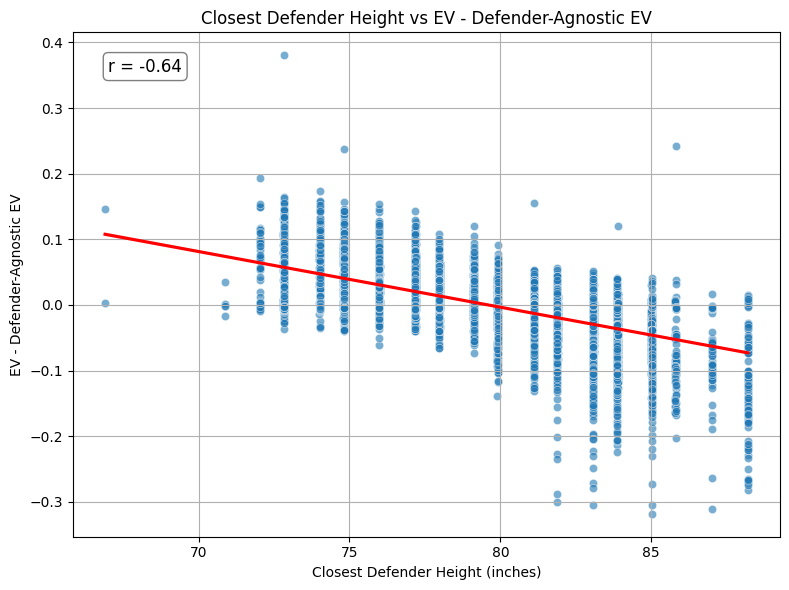

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Drop NaNs to avoid errors
plot_df = pbp_shots_df[['closest_defender_height', 'initial_minus_defender']].dropna()

# Compute Pearson r
r_value, p_value = pearsonr(plot_df['closest_defender_height'], plot_df['initial_minus_defender'])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='closest_defender_height',
    y='initial_minus_defender',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='closest_defender_height',
    y='initial_minus_defender',
    scatter=False,
    color='red'
)

# Annotate correlation coefficient
plt.text(
    0.05, 0.95,
    f'r = {r_value:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)

# Axis labels and title
plt.title('Closest Defender Height vs EV - Defender-Agnostic EV')
plt.xlabel('Closest Defender Height (inches)')
plt.ylabel('EV - Defender-Agnostic EV')
plt.grid(True)
plt.tight_layout()
plt.show()

